# Project Proposal

In [15]:
# load necessary packages
library(tidyverse)
library(tidymodels)
library(repr)

In [16]:
# load data
url <- "https://raw.githubusercontent.com/DG1606/CMS-R-2020/7f00d6b5e20d99a933c582d8b544fc4d04528462/Placement_Data_Full_Class.csv"
data <- read_csv(url)
# treat status as a factor
data <- mutate(work_data, status = as_factor(status))
data

Parsed with column specification:
cols(
  sl_no = col_double(),
  gender = col_character(),
  ssc_p = col_double(),
  ssc_b = col_character(),
  hsc_p = col_double(),
  hsc_b = col_character(),
  hsc_s = col_character(),
  degree_p = col_double(),
  degree_t = col_character(),
  workex = col_character(),
  etest_p = col_double(),
  specialisation = col_character(),
  mba_p = col_double(),
  status = col_character(),
  salary = col_double()
)



sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NA
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NA
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000
9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000


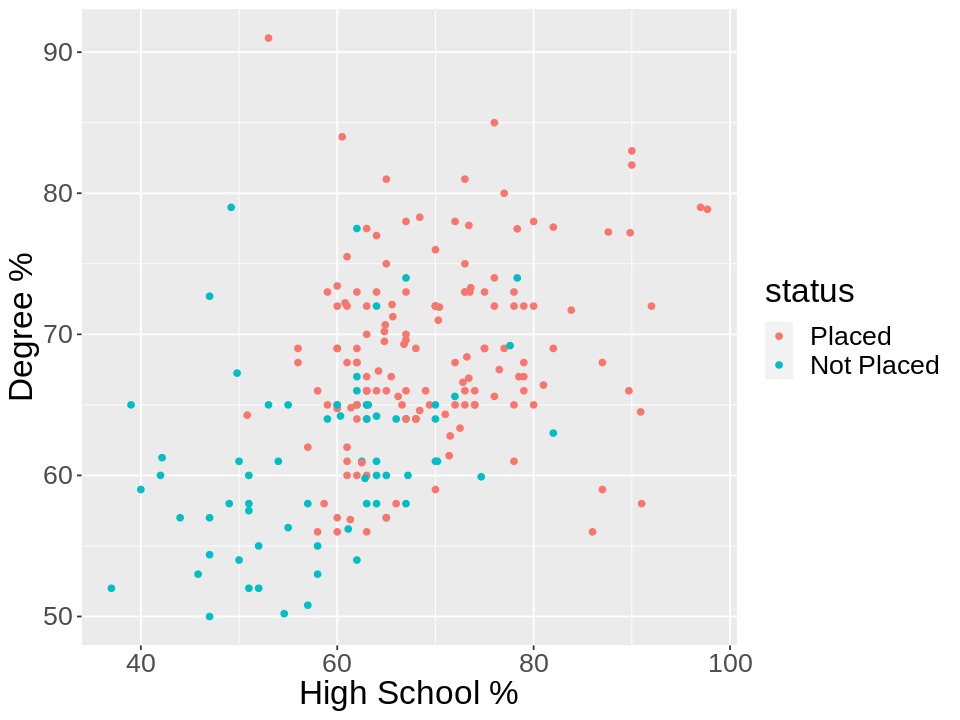

In [20]:
# visualize data
options(repr.plot.width=8, repr.plot.height=6) 
plot <- ggplot(data, aes(x = hsc_p, y = degree_p, color = status)) +
    geom_point() + 
    xlab("High School %") +
    ylab("Degree %") +
    labs("Work Placement Status") +
    theme(text = element_text(size=20))
plot

In [17]:
# create model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

# train model and validate its accuracy
data_split <- initial_split(data, prop = 0.75, strata = status)
data_train <- training(data_split)
data_test <- testing(data_split)

data_vfold <- vfold_cv(data_train, v = 8, strata = status)

new_recipe <- recipe(status ~ ssc_p + hsc_p + degree_p + mba_p, data = data_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_fit <- workflow() %>%
    add_recipe(new_recipe) %>%
    add_model(knn_spec) %>%
    fit_resamples(resamples = data_vfold)

vfold_metrics <- knn_fit %>% 
    collect_metrics() %>% 
    filter(.metric == "accuracy") 

# display success metrics
vfold_metrics

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.8591949,8,0.01872351
